<a href="https://colab.research.google.com/github/ShivakumarRavi/Housing_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.



In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [144]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [145]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/House Price Prediction/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Data Inspection**

In [146]:
data.shape

(1460, 81)

In [147]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **Exploratory Data Analysis**

First come first, will check the null values in the dataset

In [149]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [150]:
round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False)[round(data.isnull().sum()/len(data.index),2) > 0.0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64

In [151]:
# Checking the number of numerical features and the number of categorical features
num_col = []
cat_col = []
for i in data.columns:
    if data[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
print('There are', len(num_col) ,'numerical features in the dataset')
print('There are', len(cat_col), 'categorical features in the dataset')

There are 38 numerical features in the dataset
There are 43 categorical features in the dataset


Checking whether the year house has been sold will affect the sale price or not?

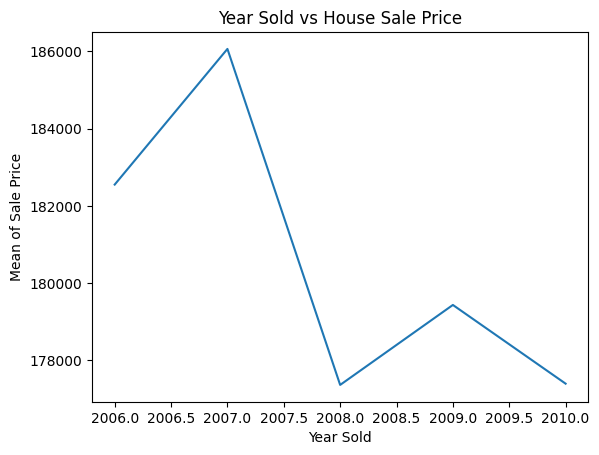

In [152]:
data.groupby('YrSold')['SalePrice'].mean().plot()
plt.title("Year Sold vs House Sale Price")
plt.xlabel("Year Sold")
plt.ylabel("Mean of Sale Price")
plt.show()

Here we have a clean indication of clear drop in the sale price after 2007, and it got increase little bit by 2009 and again it got dropping streadly.

In [153]:
year_columns = []
for col in data.columns:
  if 'Yr' in col or 'Year' in col or 'yr' in col or 'year' in col:
    year_columns.append(col)

print("Columns which represent the year are: {0}".format(year_columns))

Columns which represent the year are: ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


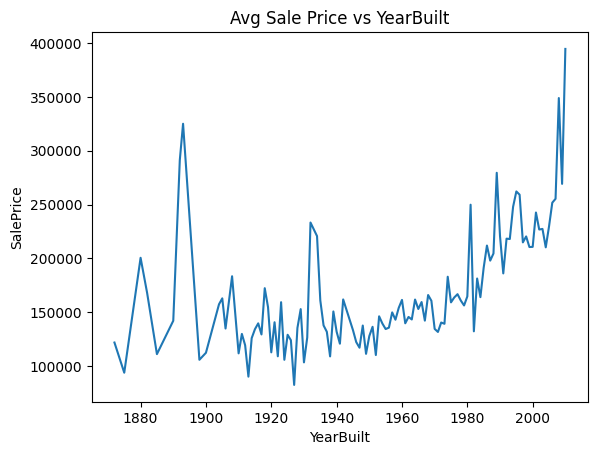

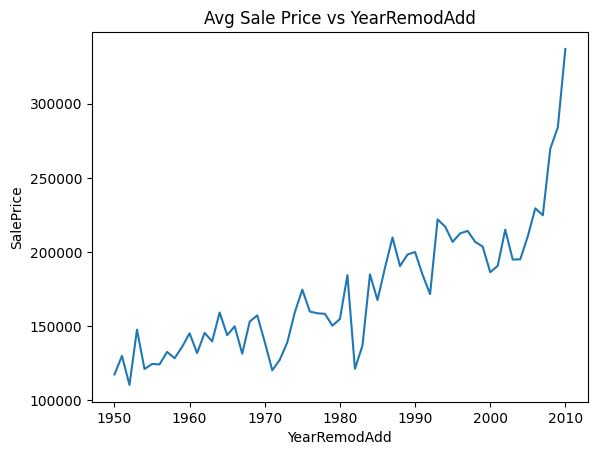

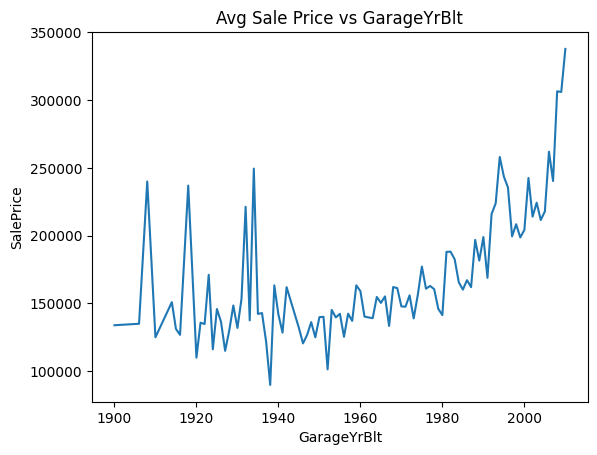

In [154]:
for col in year_columns:
  if col != "YrSold":
    data.groupby(col)['SalePrice'].mean().plot()
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title("Avg Sale Price vs {0}".format(col))
    plt.show()

In [155]:
# Dropping ID Columns from dataset since it is use an sequence number to identify the rows in the dataset and doesn't help in the prediction.
data.drop('Id', axis=1, inplace=True)

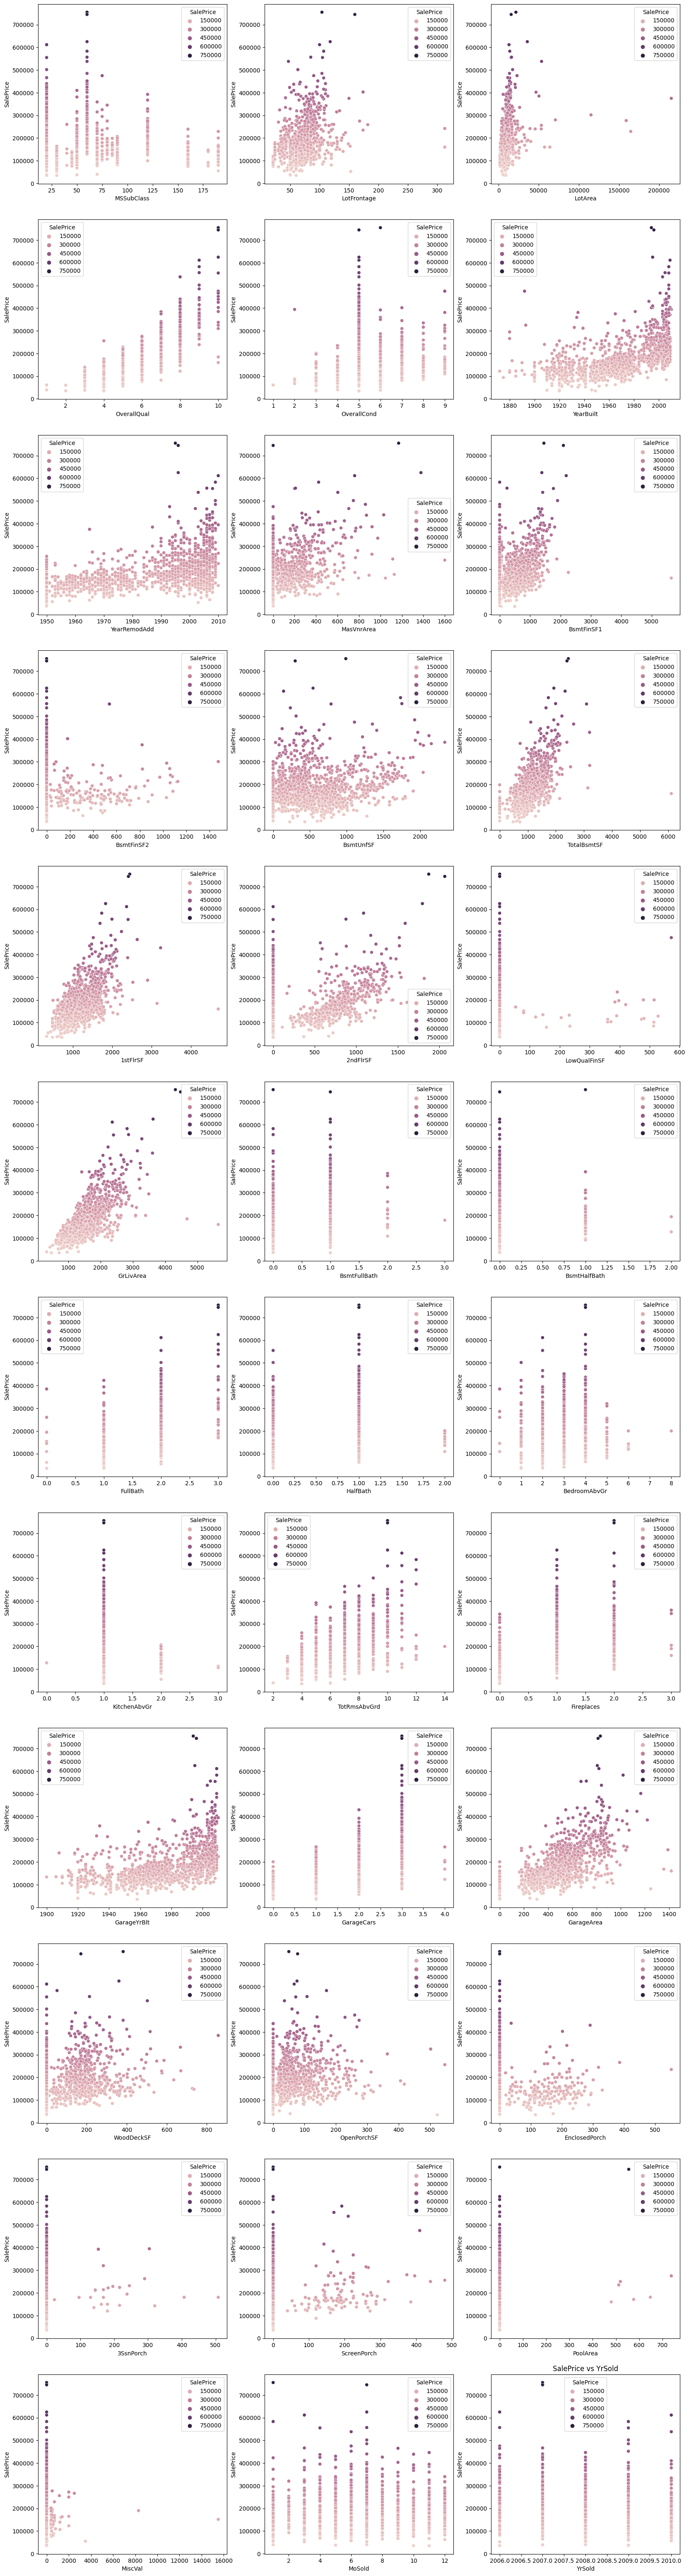

In [156]:
data_numerical = data.select_dtypes(include=['int64', 'float64'])
fig, axis = plt.subplots(12,3, figsize=(20,80))
for col, ax in zip(data_numerical.columns, axis.flatten()):
  sns.scatterplot(x=col, y='SalePrice', hue='SalePrice', data=data_numerical, ax=ax)
  plt.xlabel(col)
  plt.ylabel('SalePrice')
  plt.title('SalePrice vs {0}'.format(col))

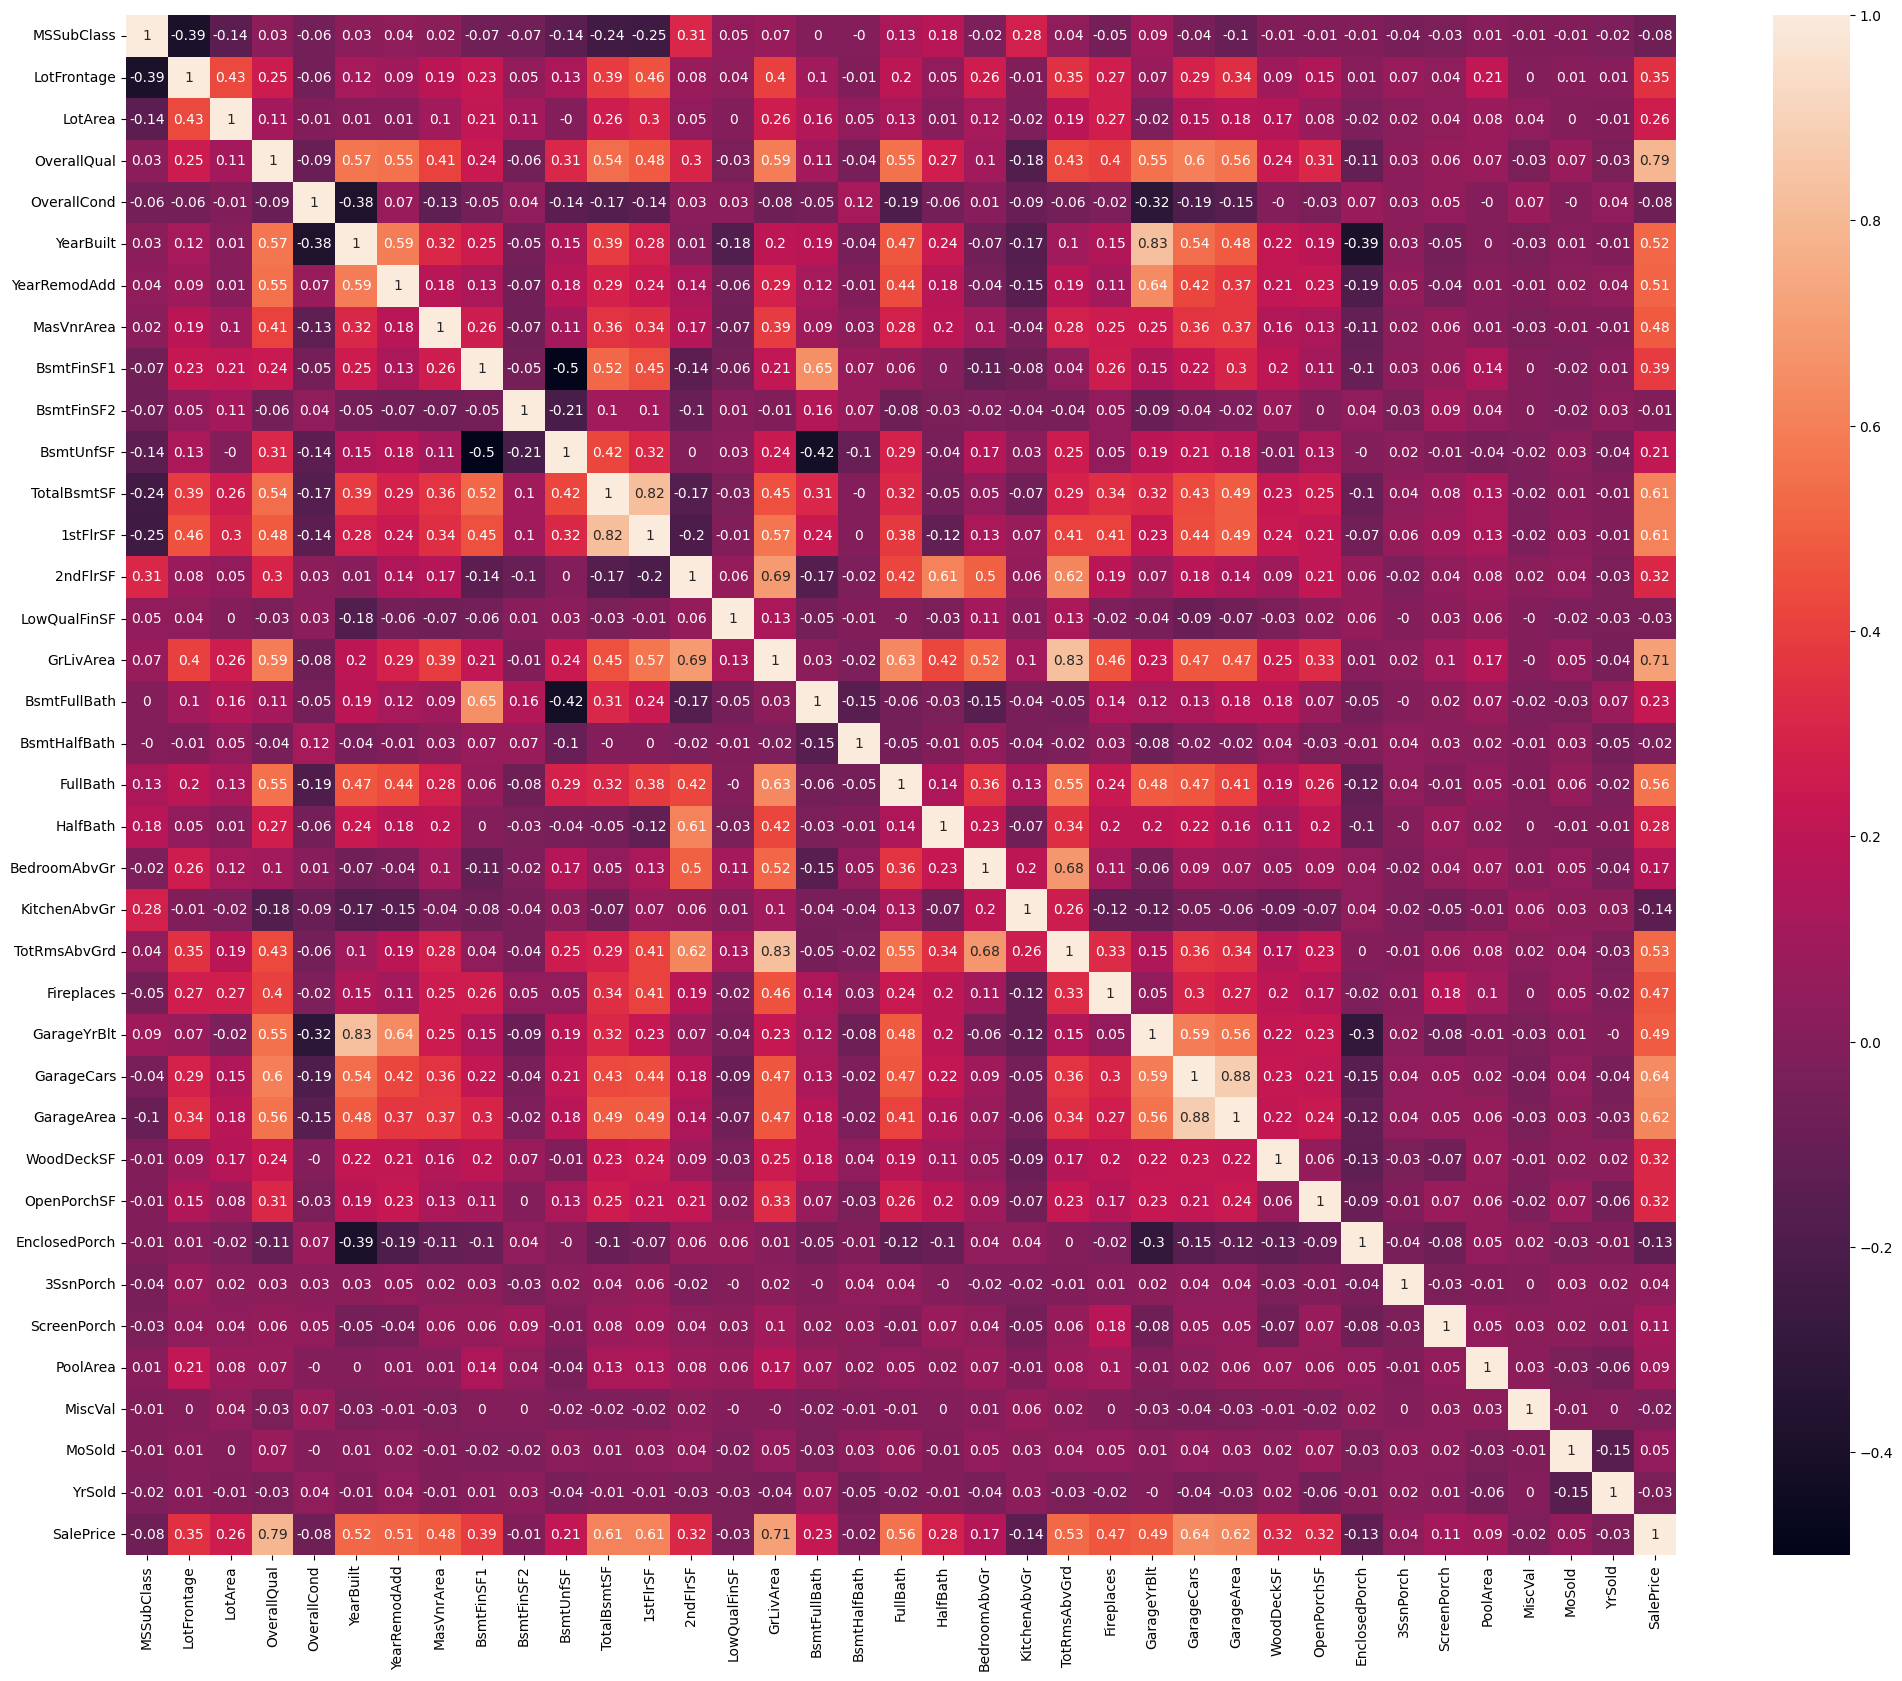

In [157]:
plt.subplots(figsize=(25,20))
sns.heatmap(data=round(data.corr(),2), annot=True)
plt.show()

From the above heat map clearly we are able to observe few high correlated variables
for example, YearBuild has high correlation with GarageYrBlt features.
similar to this, 1stFlrSF has high correlation with the feature TotalBsmtSF.

# **Data Preparation**

In [158]:
data['age'] = data['YrSold']-data['YearBuilt']
data['garage_age'] = data['YrSold'] - data['GarageYrBlt']
data['remodel_age'] = data['YrSold'] - data['YearRemodAdd']

In [159]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
data[['MSSubClass']] = data[['MSSubClass']].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

## **Handling Missing Values**

Dataset has few features represents the value NA, which indicate some info for the feature but the Pandas framework considering those values are null values since we have the high null values when we check them. To avoid this scenario let's replace some NA values into None, so that Pandas framework doesn't consider those values are null values.

In [160]:
#NA = No Pool for PoolQC
data['PoolQC'] = data['PoolQC'].fillna('None')
#NA = No Misc Feature for MiscFeature
data['MiscFeature'] = data['MiscFeature'].fillna('None')
#NA = No Alley
data['Alley'] = data['Alley'].fillna('None')
#NA = No Fireplace for FireplaceQu
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')
#NA = No Fence
data['Fence'] = data['Fence'].fillna('None')
#NA = No Fireplace
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')
#NA = No Garage
data['GarageCond'] = data['GarageCond'].fillna('None')
data['GarageType'] = data['GarageType'].fillna('None')
data['GarageFinish'] = data['GarageFinish'].fillna('None')
data['GarageQual'] = data['GarageQual'].fillna('None')
data['garage_age'] = data['GarageQual'].fillna(0)   #No Garage No Age
#NA = No Basement
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')
data['BsmtCond'] = data['BsmtCond'].fillna('None')
data['BsmtQual'] = data['BsmtQual'].fillna('None')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')
#NA = No Masonery Area
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

Check the null value again.

In [161]:
round(data.isnull().sum()/len(data.index)*100,5)[round(data.isnull().sum()/len(data.index),2) > 0]

LotFrontage    17.73973
GarageYrBlt     5.54795
dtype: float64

In [162]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

In [163]:
round(data.isnull().sum()/len(data.index)*100,5)[round(data.isnull().sum()/len(data.index),2) > 0]

Series([], dtype: float64)

## **Feature Engineering**

Some columns have above 99% same values, thus it does not play any part on predicting the target variable

In [164]:
# Trying to remove redundant features
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

redundant_features = redundant_feature(data)
redundant_features

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [165]:
# Dropping these features since they have more than 99% of a single category and thus play no part in the prediction
data.drop(redundant_features,axis=1,inplace=True)

In [166]:
data.shape

(1460, 79)

## **Outlier Treatment**

In [167]:
# Removing outliers to make the model more robust
def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))]
    return x
data = drop_outliers(data)
data.shape

(1455, 79)

## **Creating Dummy Variables**

In [168]:
cat_col=[]
for i in data.columns:
    if data[i].dtypes == 'O':
        cat_col.append(i)

#Creating Dummy Variables for Categorical Columns
data_cat_dummy= pd.get_dummies(data[cat_col])
df=pd.concat([data,data_cat_dummy],axis=1)
df= df.drop(cat_col,axis=1)

In [169]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [170]:
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc','garage_age_None'],
         axis=1,inplace=True)

In [171]:
# Chekcing the shape after dropping all co-related columns
X.shape

(1455, 233)

In [172]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

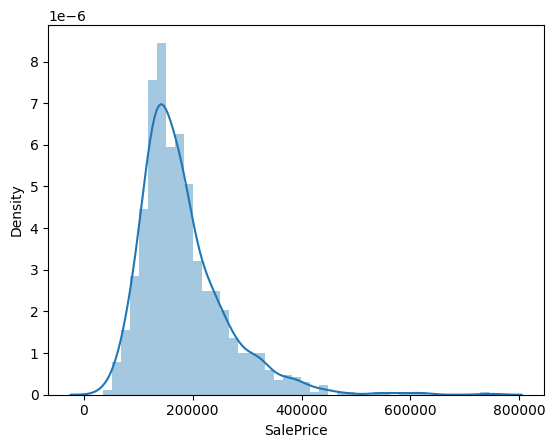

In [173]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

The above graph clearly indicates that Data is right-skewed. Thus we transform it to make it more gaussian.

In [174]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

In [175]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

In [176]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF
232,garage_age_TA,inf
95,Exterior1st_AsbShng,inf
109,Exterior1st_WdShing,inf
187,GarageFinish_Unf,inf
108,Exterior1st_Wd Sdng,inf
107,Exterior1st_VinylSd,inf
106,Exterior1st_Stucco,inf
105,Exterior1st_Stone,inf
104,Exterior1st_Plywood,inf
103,Exterior1st_MetalSd,inf


In [177]:
# Dropping cols with high VIF to avoid multicolinearity in the dataset.
X_train = X_train.drop(high_vif.Features,axis=1)
X_test = X_test.drop(high_vif.Features,axis=1)

In [178]:
X_train.shape

(1018, 148)

# **Model Building**

## **Ridge Regression**

### Model - 1

In [179]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10]}
ridge = Ridge()

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)
model_cv.fit(X_train, y_train)


Fitting 11 folds for each of 23 candidates, totalling 253 fits


GridSearchCV(cv=11, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10]},
             return_train_score=True, scoring='r2', verbose=1)

In [180]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,mean_train_score,std_train_score
0,0.025966,0.006413,0.011293,0.002618,0.0001,{'alpha': 0.0001},0.788799,0.790254,0.776280,0.838387,0.834394,0.813241,0.830856,0.835938,0.803920,0.775826,0.854499,0.812945,0.026259,23,0.883161,0.883321,0.885177,0.882039,0.882136,0.883780,0.881725,0.881453,0.881941,0.886198,0.879910,0.882804,0.001696
1,0.030313,0.005809,0.013007,0.002494,0.001,{'alpha': 0.001},0.788842,0.790300,0.776322,0.838411,0.834417,0.813251,0.830879,0.836013,0.805690,0.775855,0.854515,0.813136,0.026206,22,0.883161,0.883320,0.885177,0.882039,0.882136,0.883780,0.881725,0.881453,0.881941,0.886198,0.879910,0.882804,0.001696
2,0.031149,0.003941,0.015395,0.003694,0.01,{'alpha': 0.01},0.789263,0.790749,0.776728,0.838646,0.834646,0.813348,0.831103,0.836734,0.815027,0.776139,0.854678,0.814278,0.026066,21,0.883160,0.883320,0.885176,0.882038,0.882135,0.883779,0.881724,0.881452,0.881936,0.886197,0.879910,0.882802,0.001696
3,0.033025,0.005504,0.012503,0.003067,0.05,{'alpha': 0.05},0.790969,0.792505,0.778279,0.839632,0.835623,0.813749,0.832025,0.839417,0.822453,0.777341,0.855343,0.816121,0.026005,20,0.883146,0.883305,0.885158,0.882022,0.882121,0.883765,0.881709,0.881423,0.881905,0.886183,0.879893,0.882784,0.001698
4,0.034214,0.008331,0.014529,0.002610,0.1,{'alpha': 0.1},0.792807,0.794265,0.779811,0.840743,0.836761,0.814194,0.833038,0.841919,0.824988,0.778726,0.856069,0.817575,0.025897,19,0.883109,0.883266,0.885111,0.881978,0.882080,0.883728,0.881667,0.881352,0.881853,0.886141,0.879848,0.882739,0.001701
5,0.032173,0.004408,0.015302,0.002283,0.2,{'alpha': 0.2},0.795826,0.796815,0.782100,0.842648,0.838805,0.814937,0.834730,0.845272,0.828220,0.781176,0.857271,0.819800,0.025708,17,0.882988,0.883138,0.884967,0.881833,0.881944,0.883603,0.881531,0.881151,0.881698,0.886005,0.879703,0.882596,0.001709
6,0.026748,0.007224,0.014534,0.004679,0.3,{'alpha': 0.3},0.798253,0.798544,0.783813,0.844228,0.840597,0.815532,0.836118,0.847394,0.830478,0.783289,0.858234,0.821498,0.025546,15,0.882821,0.882966,0.884783,0.881638,0.881758,0.883433,0.881350,0.880907,0.881495,0.885818,0.879510,0.882407,0.001717
7,0.027931,0.006636,0.012468,0.003790,0.4,{'alpha': 0.4},0.800266,0.799757,0.785195,0.845561,0.842188,0.816014,0.837300,0.848821,0.832140,0.785134,0.859022,0.822854,0.025403,13,0.882621,0.882763,0.884571,0.881409,0.881538,0.883231,0.881141,0.880641,0.881260,0.885596,0.879284,0.882187,0.001725
8,0.029787,0.005546,0.013259,0.003523,0.5,{'alpha': 0.5},0.801966,0.800624,0.786362,0.846701,0.843612,0.816408,0.838336,0.849809,0.833394,0.786761,0.859675,0.823968,0.025272,12,0.882395,0.882538,0.884341,0.881157,0.881293,0.883006,0.880911,0.880360,0.881003,0.885350,0.879036,0.881945,0.001732
9,0.028881,0.005134,0.012390,0.003186,0.6,{'alpha': 0.6},0.803418,0.801243,0.787376,0.847687,0.844897,0.816729,0.839261,0.850497,0.834358,0.788207,0.860217,0.824899,0.025154,10,0.882150,0.882297,0.884096,0.880887,0.881031,0.882764,0.880666,0.880069,0.880730,0.885084,0.878771,0.881686,0.001738


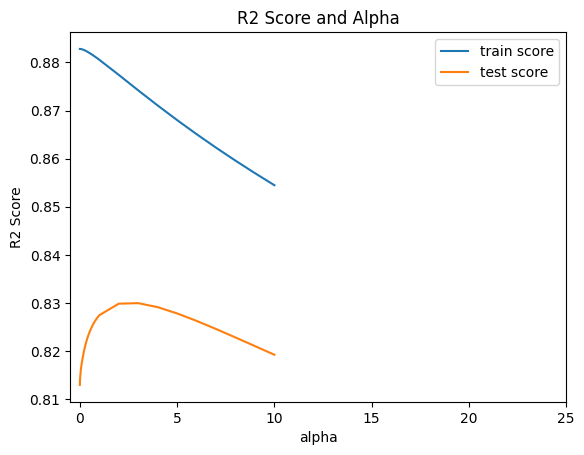

In [181]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

In [182]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)

The optimum alpha is 3.0


In [183]:
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for optimum alpha is 0.7971944507759029
The MSE of the model on the test dataset for optimum alpha is 0.0033925719259300996


### Model - 2

Create RFE model to filter the features

In [184]:
# Using RFE to find top 50 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=50)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

Building the Second model using the RFE selected features

In [185]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10]}
ridge = Ridge()

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)
model_cv.fit(X_train_rfe, y_train)


Fitting 11 folds for each of 23 candidates, totalling 253 fits


GridSearchCV(cv=11, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10]},
             return_train_score=True, scoring='r2', verbose=1)

In [186]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,mean_train_score,std_train_score
0,0.005241,0.001703,0.002917,0.000208,0.0001,{'alpha': 0.0001},0.798361,0.815029,0.800202,0.844473,0.835978,0.808060,0.828881,0.874660,0.822627,0.776867,0.873319,0.825314,0.029152,17,0.860020,0.859890,0.861634,0.858098,0.859072,0.861473,0.859219,0.854347,0.859043,0.863432,0.853844,0.859097,0.002756
1,0.004653,0.000220,0.002790,0.000165,0.001,{'alpha': 0.001},0.798374,0.815025,0.800208,0.844482,0.835986,0.808067,0.828883,0.874670,0.822657,0.776882,0.873315,0.825323,0.029149,16,0.860020,0.859890,0.861634,0.858098,0.859072,0.861473,0.859219,0.854347,0.859043,0.863432,0.853844,0.859097,0.002756
2,0.004843,0.000482,0.002848,0.000174,0.01,{'alpha': 0.01},0.798505,0.814980,0.800270,0.844570,0.836062,0.808135,0.828895,0.874768,0.822955,0.777034,0.873278,0.825405,0.029123,15,0.860020,0.859890,0.861633,0.858098,0.859072,0.861472,0.859219,0.854347,0.859042,0.863432,0.853843,0.859097,0.002756
3,0.005966,0.003325,0.003250,0.001080,0.05,{'alpha': 0.05},0.799075,0.814782,0.800538,0.844937,0.836392,0.808423,0.828952,0.875165,0.824141,0.777691,0.873116,0.825747,0.029010,14,0.860014,0.859879,0.861623,0.858086,0.859061,0.861461,0.859208,0.854334,0.859029,0.863420,0.853833,0.859086,0.002756
4,0.007349,0.003807,0.003671,0.001234,0.1,{'alpha': 0.1},0.799755,0.814533,0.800864,0.845351,0.836785,0.808753,0.829032,0.875585,0.825348,0.778471,0.872924,0.826127,0.028872,12,0.859996,0.859850,0.861593,0.858052,0.859031,0.861430,0.859179,0.854299,0.858992,0.863388,0.853805,0.859056,0.002756
5,0.004660,0.000164,0.002873,0.000239,0.2,{'alpha': 0.2},0.801017,0.814033,0.801480,0.846051,0.837514,0.809320,0.829216,0.876217,0.827083,0.779911,0.872564,0.826764,0.028605,11,0.859931,0.859750,0.861492,0.857938,0.858926,0.861322,0.859079,0.854180,0.858868,0.863277,0.853708,0.858952,0.002758
6,0.005098,0.001426,0.002862,0.000227,0.3,{'alpha': 0.3},0.802160,0.813532,0.802053,0.846617,0.838172,0.809781,0.829425,0.876632,0.828194,0.781209,0.872227,0.827273,0.028347,10,0.859832,0.859610,0.861349,0.857780,0.858780,0.861171,0.858939,0.854017,0.858698,0.863122,0.853571,0.858806,0.002760
7,0.005089,0.000902,0.003626,0.002504,0.4,{'alpha': 0.4},0.803195,0.813030,0.802585,0.847077,0.838767,0.810150,0.829650,0.876884,0.828902,0.782383,0.871906,0.827684,0.028098,9,0.859704,0.859443,0.861177,0.857592,0.858604,0.860989,0.858771,0.853822,0.858499,0.862935,0.853405,0.858631,0.002762
8,0.005212,0.001576,0.002929,0.000212,0.5,{'alpha': 0.5},0.804133,0.812529,0.803077,0.847452,0.839304,0.810441,0.829887,0.877011,0.829341,0.783448,0.871595,0.828020,0.027859,7,0.859553,0.859256,0.860983,0.857382,0.858405,0.860784,0.858581,0.853606,0.858280,0.862725,0.853219,0.858434,0.002764
9,0.004545,0.000218,0.002970,0.000778,0.6,{'alpha': 0.6},0.804983,0.812029,0.803533,0.847757,0.839788,0.810664,0.830130,0.877040,0.829600,0.784418,0.871292,0.828294,0.027631,6,0.859380,0.859054,0.860772,0.857156,0.858190,0.860563,0.858376,0.853375,0.858047,0.862496,0.853015,0.858220,0.002765


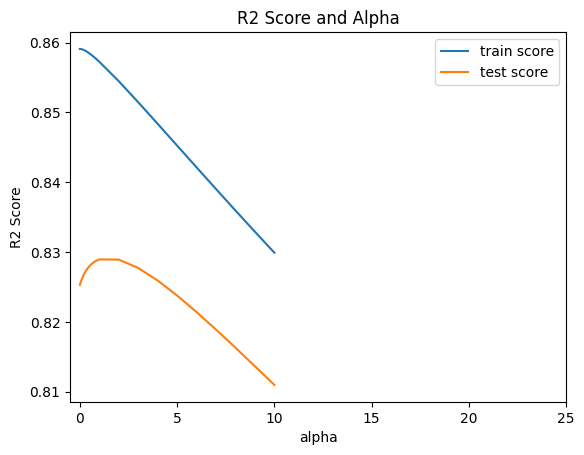

In [187]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

In [188]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)

The optimum alpha is 1.0


In [189]:
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for optimum alpha is 0.7837937064336867
The MSE of the model on the test dataset for optimum alpha is 0.0036167422665144854


In [200]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef),columns=X_train_rfe.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(50)

,Ridge Co-Efficient
TotRmsAbvGrd,0.215433
GarageArea,0.181533
LotArea,0.147161
OverallCond,0.072884
LotFrontage,0.057041
OpenPorchSF,0.055197
Neighborhood_StoneBr,0.051308
CentralAir_Y,0.051104
Alley_Pave,0.046705
BsmtQual_Ex,0.044938


## **Lasso Regression**

In [192]:
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)
# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)
model_cv.fit(X_train_rfe, y_train)

Fitting 11 folds for each of 11 candidates, totalling 121 fits


GridSearchCV(cv=11, estimator=Lasso(random_state=100),
             param_grid={'alpha': [1e-05, 9e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009]},
             return_train_score=True, scoring='r2', verbose=1)

In [193]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,mean_train_score,std_train_score
0,0.029491,0.004854,0.007897,0.004789,0.00001,{'alpha': 1e-05},0.798297,0.813596,0.799992,0.844984,0.836582,0.808175,0.829081,0.875721,0.824121,0.776712,0.873460,0.825520,0.029468,1,0.859981,0.859848,0.861592,0.858053,0.859030,0.861429,0.859177,0.854306,0.858998,0.863390,0.853800,0.859055,0.002756
1,0.037663,0.006742,0.012689,0.005448,0.00009,{'alpha': 9e-05},0.798090,0.806251,0.801621,0.846840,0.838429,0.806311,0.829499,0.877934,0.815435,0.776973,0.873391,0.824616,0.030435,2,0.857127,0.856754,0.858612,0.855038,0.855794,0.858237,0.855937,0.850970,0.855561,0.860220,0.850386,0.855876,0.002849
2,0.031612,0.008564,0.010491,0.004182,0.0001,{'alpha': 0.0001},0.798521,0.805350,0.801932,0.847064,0.838335,0.806269,0.829737,0.877449,0.811903,0.777275,0.873194,0.824275,0.030413,3,0.856666,0.856165,0.858076,0.854414,0.855123,0.857670,0.855329,0.850255,0.854925,0.859608,0.849670,0.855264,0.002901
3,0.026444,0.011390,0.008282,0.004626,0.0002,{'alpha': 0.0002},0.800866,0.797611,0.803647,0.844898,0.838382,0.802542,0.831051,0.869402,0.794794,0.779666,0.869530,0.821126,0.029636,4,0.850855,0.849037,0.850701,0.846024,0.847605,0.849913,0.848014,0.841823,0.847438,0.852528,0.841396,0.847758,0.003387
4,0.007914,0.002752,0.003596,0.000872,0.0003,{'alpha': 0.0003},0.801571,0.791266,0.802719,0.840929,0.837410,0.794329,0.830184,0.857485,0.791040,0.780981,0.863953,0.817442,0.027951,5,0.844332,0.842993,0.844108,0.839794,0.840785,0.843100,0.841507,0.834892,0.842021,0.846690,0.834461,0.841335,0.003608
5,0.020144,0.004426,0.006428,0.002467,0.0004,{'alpha': 0.0004},0.799714,0.784845,0.802202,0.836628,0.833122,0.787388,0.828155,0.847785,0.789724,0.780868,0.858821,0.813568,0.026654,6,0.837805,0.836653,0.838096,0.832808,0.834430,0.837511,0.835168,0.828836,0.837481,0.839717,0.827801,0.835119,0.003689
6,0.015302,0.001343,0.004034,0.001449,0.0005,{'alpha': 0.0005},0.796149,0.776555,0.799883,0.829206,0.829090,0.781059,0.826556,0.838242,0.787263,0.778705,0.853379,0.808735,0.025965,7,0.831754,0.830414,0.832266,0.826256,0.829241,0.832361,0.829786,0.823450,0.832694,0.834084,0.822266,0.829506,0.003724
7,0.014376,0.008662,0.004111,0.001748,0.0006,{'alpha': 0.0006},0.791653,0.767359,0.795072,0.819263,0.824533,0.774052,0.823871,0.830080,0.784407,0.775538,0.847305,0.803012,0.025690,8,0.825761,0.824839,0.826179,0.820506,0.823996,0.826774,0.824286,0.817682,0.827448,0.828514,0.816498,0.823862,0.003775
8,0.017163,0.004981,0.006637,0.004585,0.0007,{'alpha': 0.0007},0.786227,0.757096,0.788208,0.807825,0.819551,0.766191,0.821085,0.821026,0.780500,0.771787,0.845110,0.796782,0.026526,9,0.819586,0.818688,0.819825,0.813711,0.817964,0.820525,0.818431,0.811790,0.821360,0.822457,0.810946,0.817753,0.003694
9,0.016133,0.002963,0.004638,0.001917,0.0008,{'alpha': 0.0008},0.779107,0.746109,0.779777,0.799336,0.814078,0.757521,0.817826,0.811374,0.775640,0.766848,0.842532,0.790013,0.027968,10,0.812461,0.811776,0.812807,0.807368,0.811427,0.813639,0.811910,0.805317,0.814513,0.815470,0.804761,0.811041,0.003447


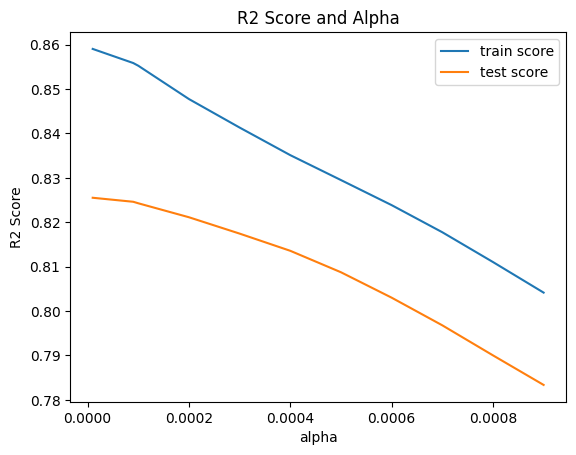

In [194]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [195]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)

The optimum alpha is 1e-05


In [196]:
lasso_final = Lasso(alpha=alpha,random_state=100)
lasso_final.fit(X_train_rfe,y_train)
lasso_coef = lasso_final.coef_
y_test_pred = lasso_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for optimum alpha is 0.7782376151335186
The MSE of the model on the test dataset for optimum alpha is 0.003709685676766176


In [201]:
#Displaing the co-efficients of the model
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso_coef),columns=X_train_rfe.columns)
lasso_coeff = lasso_coeff.T
lasso_coeff.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff.head(50)

,Lasso Co-Efficient
TotRmsAbvGrd,0.223268
GarageArea,0.191102
LotArea,0.166202
OverallCond,0.077847
SaleType_Con,0.062571
OpenPorchSF,0.054311
Neighborhood_StoneBr,0.053952
SaleType_CWD,0.053459
LotFrontage,0.052646
Alley_Pave,0.049967


# **Conclusion**

We are able to make approximately R2 score of 78% in both the models

The follwing factors influence the house price the most as demosntrated by both the models:



*   Total Rooms above grade
*   Total Garage Area
*   Lot Area
*   Overall condition
*   Sale Type
*   Open porch area in square feet
*   Neighborhood
*   Linear feet of street connected to property
*   Type of alley access to property
*   Central air conditioning



# **Subjective Questions**



1.   What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?



Ans: The Optimal value of alpha for ridge is 1 and for lasso it is 0.00001.

In [202]:
# Building Ridge Model by doubling the value of alpha to 4
ridge_2 = Ridge(alpha=2,random_state=100)
ridge_2.fit(X_train_rfe,y_train)
ridge_2_coef = ridge_2.coef_
y_test_pred = ridge_2.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_2_coeff = pd.DataFrame(np.atleast_2d(ridge_2_coef),columns=X_train_rfe.columns)
ridge_2_coeff = ridge_2_coeff.T
ridge_2_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_2_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_2_coeff.head(10)

The R2 Score of the model on the test dataset for doubled alpha is 0.7852966860776869
The MSE of the model on the test dataset for doubled alpha is 0.0035916001214154622
The most important predictor variables are as follows:


,Ridge Doubled Alpha Co-Efficient
TotRmsAbvGrd,0.208272
GarageArea,0.173356
LotArea,0.132928
OverallCond,0.068787
LotFrontage,0.057228
OpenPorchSF,0.054851
CentralAir_Y,0.051812
Neighborhood_StoneBr,0.048193
BsmtQual_Ex,0.046360
Alley_Pave,0.043235


In [203]:
# Building Lasso Model by doubling the value of alpha to 0.0002
lasso_2 = Lasso(alpha=0.00002,random_state=100)
lasso_2.fit(X_train_rfe,y_train)
lasso_2_coef = lasso_2.coef_
y_test_pred = lasso_2.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_2_coeff = pd.DataFrame(np.atleast_2d(lasso_2_coef),columns=X_train_rfe.columns)
lasso_2_coeff = lasso_2_coeff.T
lasso_2_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_2_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_2_coeff.head(10)

The R2 Score of the model on the test dataset for doubled alpha is 0.7799319354760831
The MSE of the model on the test dataset for doubled alpha is 0.003681342746063798
The most important predictor variables are as follows:


,Lasso Doubled Alpha Co-Efficient
TotRmsAbvGrd,0.223099
GarageArea,0.191003
LotArea,0.165313
OverallCond,0.076941
SaleType_Con,0.057506
OpenPorchSF,0.053775
Neighborhood_StoneBr,0.053233
LotFrontage,0.051198
SaleType_CWD,0.051091
CentralAir_Y,0.049670


Since the alpha value was quite small, doubling it does not do any significant change in both the models and the R2 and MSE remains almost the same. The most important predictor variables also remain the same, but the Evaluates the height of the basement - Excellent attribute gains higher importance than Alley in the Ridge Model.



3.   After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?



In [206]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe_1 = X_test_rfe.drop(['TotRmsAbvGrd','GarageArea','OverallCond','LotArea', 'SaleType_Con'],axis=1)
X_train_rfe_1 = X_train_rfe.drop(['TotRmsAbvGrd','GarageArea','OverallCond','LotArea', 'SaleType_Con'],axis=1)

# Building Lasso Model with the new dataset
lasso2 = Lasso(alpha=0.0001,random_state=100)
lasso2.fit(X_train_rfe_1,y_train)
lasso2_coef = lasso2.coef_
y_test_pred = lasso2.predict(X_test_rfe_1)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso2_coeff = pd.DataFrame(np.atleast_2d(lasso2_coef),columns=X_train_rfe_1.columns)
lasso2_coeff = lasso2_coeff.T
lasso2_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso2_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso2_coeff.head(5)

The R2 Score of the model on the test dataset is 0.6500148230347416
The MSE of the model on the test dataset is 0.0058546222744231225
The most important predictor variables are as follows:


,Lasso Co-Efficient
LotFrontage,0.268143
OpenPorchSF,0.114755
BsmtQual_Ex,0.067629
CentralAir_Y,0.063115
KitchenQual_Ex,0.061314
